# Task 4: Machine Learning Model - SMS Spam Detection

This notebook demonstrates how to create a predictive model using scikit-learn to classify text messages as spam or not spam. The dataset used is the SMS Spam Collection dataset, and the model is implemented using the Naive Bayes algorithm.

## Step 1: Import Required Libraries
We import necessary libraries for data loading, preprocessing, model training, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Step 2: Load and Explore the Dataset
We load the dataset `spam.csv`, remove unnecessary columns, and examine the data.

In [2]:
# Load dataset and clean it
df = pd.read_csv("spam.csv.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Step 3: Visualize Data Distribution
We visualize the number of spam and ham messages in the dataset.

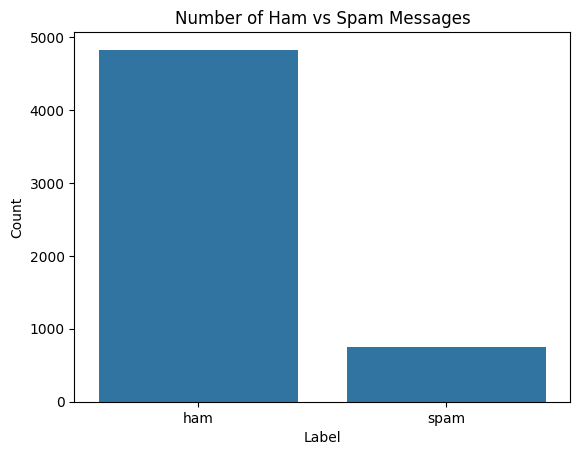

In [3]:
# Plot the distribution of classes
sns.countplot(x='label', data=df)
plt.title('Number of Ham vs Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Step 4: Data Preprocessing
Convert the labels to numerical values and split the dataset into training and testing sets.

In [4]:
# Convert labels to numeric
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
print(f'Training samples: {len(X_train)}, Testing samples: {len(X_test)}')

Training samples: 4457, Testing samples: 1115


## Step 5: Text Vectorization
Use `CountVectorizer` to transform the text data into numerical format for the machine learning model.

In [5]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f'Feature matrix shape (training): {X_train_vec.shape}')

Feature matrix shape (training): (4457, 7735)


## Step 6: Train the Naive Bayes Model
We train a Naive Bayes classifier using the training data.

In [6]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

## Step 7: Make Predictions and Evaluate the Model
We evaluate the model using accuracy, classification report, and confusion matrix.

✅ Accuracy: 0.9838565022421525

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



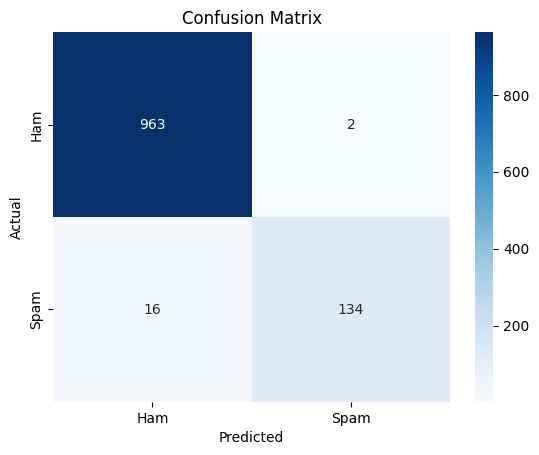

In [7]:
# Make predictions
y_pred = model.predict(X_test_vec)

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", acc)

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 📌 Conclusion
This project successfully implements a spam email detection model using scikit-learn. The dataset was preprocessed, vectorized, and classified using a Naive Bayes classifier. The model achieved high accuracy, and the confusion matrix confirms its performance in detecting spam vs ham messages.
